![picture](https://drive.google.com/uc?export=view&id=1s7sR9mOzFjeLpmH7gldgXAz7BQ6hM6jb)


# **Brain Analysis - A Machine Learning Approach**

### Our dataset contains information about the human brain.
### In this example we'll try to find out the relashionship between the head size and the brain weight. 
### First of all, let's import our dataset

In [28]:
import pandas as pd
data = pd.read_csv('/content/valeria_data/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### Any missing values ? Let's check

In [29]:
data.isnull().sum().sort_values(ascending=False)

Brain Weight(grams)    0
Head Size(cm^3)        0
Age Range              0
Gender                 0
dtype: int64

### Extracting the x and y values

In [30]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

### Plotting our dataset

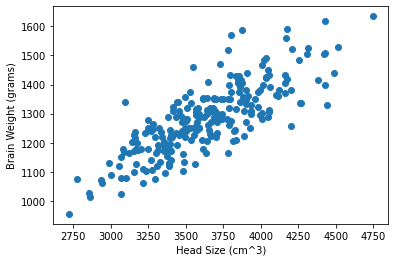

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.show()

### Usign a **Linear Regression** approach, we identify:
###    - the Head Size as our indipendent variable x 
###    - the Brain Weight as our dependent variable y.

### For our purpose, we'll use the **scikit-learn** library.
##### In order to use the model, we have to reshape the x array because the function expects a 2-dimensional array



In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
x_new = x.reshape(-1,1)
model = LinearRegression().fit(x_new,y)

### The line that best fits our observed data is **y = m x + c**
### Here we can find the **coefficient m** and the **intercept c** of our line.

In [33]:
print("coef m: " + str(model.coef_[0]))
print("intercept c: " + str(model.intercept_))

coef m: 0.26342933948939934
intercept c: 325.5734210494426


### Let's plot the observed data and the predicted line

Text(0, 0.5, 'Brain Weight (grams)')

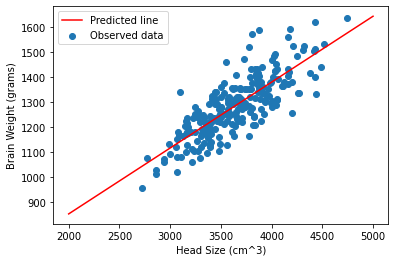

In [34]:
x_line = np.array([2000,5000])
y_line = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_line, '-r')
plt.scatter(x, y)
plt.legend(['Predicted line','Observed data'])
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")

### Now we can check some metrics to see if the model works well.
### 1. The coefficient of determination **R2 Score**
### 2. The standard deviation of residuals or **RMSE** (Root mean square error)

In [35]:
r_sq = model.score(x_new,y)
print("R square: " + str(r_sq))

R square: 0.639311719957


In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_new)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("RMSE: " + str(rmse))

RMSE: 72.1206213783709


### Using our model, we can make some prediction of new x values

In [37]:
x_to_predict = [[3752]]
predicted_y = model.predict(x_to_predict)
print(predicted_y)

[1313.96030281]
